# CODE BY SHIVEK (DENOISING AUTOENCODER)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd

In [ ]:
def signal2torch(x):
    X = np.expand_dims(x, axis = 0)
    if len(x.shape)  == 1:
        X = np.expand_dims(X, axis = 0)
    X = torch.from_numpy(X)
    X = X.type(torch.Tensor)
    X = X.permute(1,0,2)
    return X

In [ ]:
class Convautoenc(nn.Module):
    def __init__(self):
        super(Convautoenc, self).__init__()
        self.conv1 = nn.Conv1d(in_channels = 1, out_channels = 32, kernel_size = 2048, stride = 512, padding = 1023, bias = True)
        self.sysconv1 = nn.ConvTranspose1d(in_channels = 32, out_channels = 1, kernel_size = 2048, stride = 512, padding = 1023, bias = True)

    def encoder(self, x):
        x = self.conv1(x)
        y = torch.tanh(x)
        return y

    def decoder(self, y):
        xrek = self.sysconv1(y)
        return xrek

    def forward(self, x):
        y = self.encoder(x)
        y = torch.round(y/0.125)*0.125
        xrek = self.decoder(y)
        return xrek

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
batch = 1

audio, samplerate = librosa.load('/content/drive/MyDrive/Test Audio/Charlie Puth - Attention (LIVE) 4K.mp3', mono = False, sr = None, offset = 13, duration = 30)
audio[0,:]/=np.abs(audio[0,:]).max()
audio[1,:]/=np.abs(audio[1,:]).max()

X_train = signal2torch(audio[0,:])
X_test = signal2torch(audio[1,:])

In [ ]:
print('Generate Model:')
model = Convautoenc()
print('Total number of parameters: %i' % (sum(p.numel() for p in model.parameters() if p.requires_grad)))
print("Def. loss function:")
loss_fn = nn.MSELoss()

Generate Model:
Total number of parameters: 131105
Def. loss function:


In [ ]:
y_pred = model(X_train)

outputlen = len(y_pred[0,0,:])
print('outputlen = ', outputlen)

outputlen =  1439746


In [ ]:
Y = X_train[:,:,:outputlen]

print("Input X.shape=", X_train.shape)
print("Target Y.shape=", Y.shape)
print("Target Y=", Y)
print("Y.type()=", Y.type())

Input X.shape= torch.Size([1, 1, 1440000])
Target Y.shape= torch.Size([1, 1, 1439746])
Target Y= tensor([[[0.1087, 0.1028, 0.1029,  ..., 0.4086, 0.3696, 0.3289]]])
Y.type()= torch.FloatTensor


In [ ]:
learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

print('y_pred = ', y_pred)

randdir = False
if randdir == True:
    optimrandomdir_pytorch.optimizer(model, loss_fn, X_train, iterations = 100000, startingscale = 0.25, endscale = 0.0)
else:
    for epoch in range(2000):
      Xlast=X_train[:,:,-1].clone()
      X_train[:,:,1:]=X_train[:,:,:-1].clone() #round Robbin, shift 1 right
      X_train[:,:,0]=Xlast.clone()
      Ylast=Y[:,:,-1].clone()
      Y[:,:,1:]=Y[:,:,:-1].clone() #round Robbin, shift 1 right
      Y[:,:,0]=Ylast.clone()
      Ypred=model(X_train+torch.randn(X_train.size())*0.05)
      loss=loss_fn(Ypred, Y)
      if epoch%10==0:
          print(epoch, loss.item())
      optimizer.zero_grad()
      optimizer.step()

y_pred =  tensor([[[ 0.0162,  0.0068,  0.0396,  ...,  0.0016, -0.0064,  0.0090]]],
       grad_fn=<ConvolutionBackward0>)
0 0.10748021304607391
10 0.10747314244508743
20 0.10749630630016327
30 0.10749240964651108
40 0.10749977827072144
50 0.10749939829111099
60 0.10748602449893951
70 0.1075018048286438
80 0.10748840123414993
90 0.10749492794275284
100 0.10748840123414993
110 0.10749942809343338
120 0.10749129205942154
130 0.10750565677881241
140 0.10750091820955276
150 0.10750673711299896
160 0.1074984222650528
170 0.10749538987874985
180 0.10749371349811554
190 0.10748915374279022
200 0.10748660564422607
210 0.10749625414609909
220 0.1074894592165947
230 0.10750292241573334
240 0.1074937954545021
250 0.10749511420726776
260 0.10750564932823181
270 0.10748793929815292
280 0.10750173032283783
290 0.10750465840101242
300 0.10750151425600052
310 0.10748684406280518
320 0.10748443007469177
330 0.10749255120754242
340 0.10747648030519485
350 0.10748129338026047
360 0.10748589783906937
370 0

In [ ]:
ww = model.state_dict()
print("ww=", ww)

numpy_array_01 = ww['conv1.weight'].cpu().detach().numpy()
numpy_array_02 = ww['sysconv1.weight'].cpu().detach().numpy()

print(numpy_array_01.shape,  numpy_array_02.shape)

ww= OrderedDict([('conv1.weight', tensor([[[ 0.0029,  0.0132, -0.0075,  ..., -0.0057, -0.0034, -0.0119]],

        [[-0.0156,  0.0085, -0.0033,  ..., -0.0087,  0.0041, -0.0003]],

        [[-0.0094, -0.0055, -0.0027,  ...,  0.0089, -0.0083, -0.0087]],

        ...,

        [[-0.0031,  0.0036, -0.0106,  ...,  0.0128, -0.0018, -0.0039]],

        [[-0.0031,  0.0086, -0.0108,  ..., -0.0169, -0.0141,  0.0214]],

        [[-0.0220,  0.0021, -0.0153,  ..., -0.0047,  0.0158,  0.0120]]])), ('conv1.bias', tensor([-1.6182e-02,  3.5028e-03,  2.0458e-02, -1.0535e-02,  1.3424e-02,
         2.4231e-03,  2.0285e-04,  3.8641e-03, -1.6911e-02, -1.8123e-02,
        -6.0066e-03,  1.5053e-02,  2.0657e-03,  1.6804e-02, -1.2994e-02,
         6.2506e-05, -2.3616e-03,  1.1574e-02, -2.2010e-02,  6.2764e-03,
         1.6430e-02, -1.6690e-02, -1.8933e-02, -2.1011e-02, -1.2639e-02,
        -5.0902e-03,  8.0882e-03, -1.6961e-02, -4.7848e-03,  1.2704e-02,
         2.6621e-03, -2.5184e-04])), ('sysconv1.weight', te

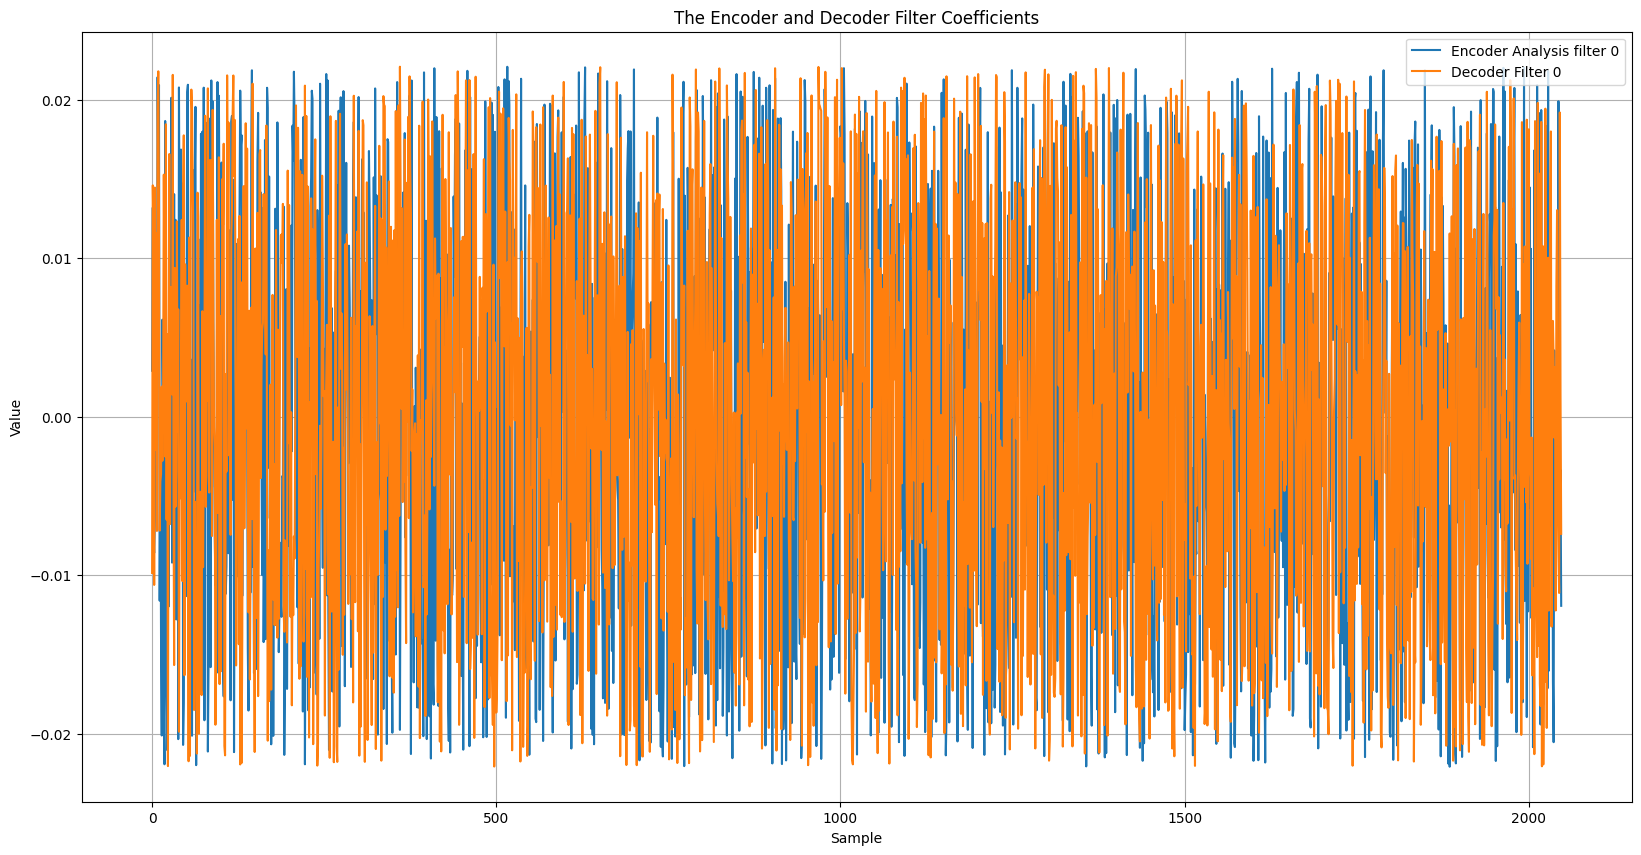

In [ ]:
plt.figure(figsize = (20,10))
plt.plot(np.transpose(np.array(numpy_array_01[0:1,0,:])))
plt.plot(np.transpose(np.array(numpy_array_02[0:1,0,:])))
plt.legend(('Encoder Analysis filter 0', 'Decoder Filter 0'))
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('The Encoder and Decoder Filter Coefficients')
plt.grid()

In [ ]:
output_array = Ypred.cpu().detach().numpy()
display(ipd.Audio(output_array[:,0,:], rate=samplerate))

In [ ]:
Xnoise=(X_train+torch.randn(X_train.size())*0.05)

predictions=model(Xnoise).cpu()
predictions=predictions.detach()
predictions=np.array(predictions)
Y=np.array(Y)
print("predictions.shape=", predictions.shape)

predictions.shape= (1, 1, 1439746)


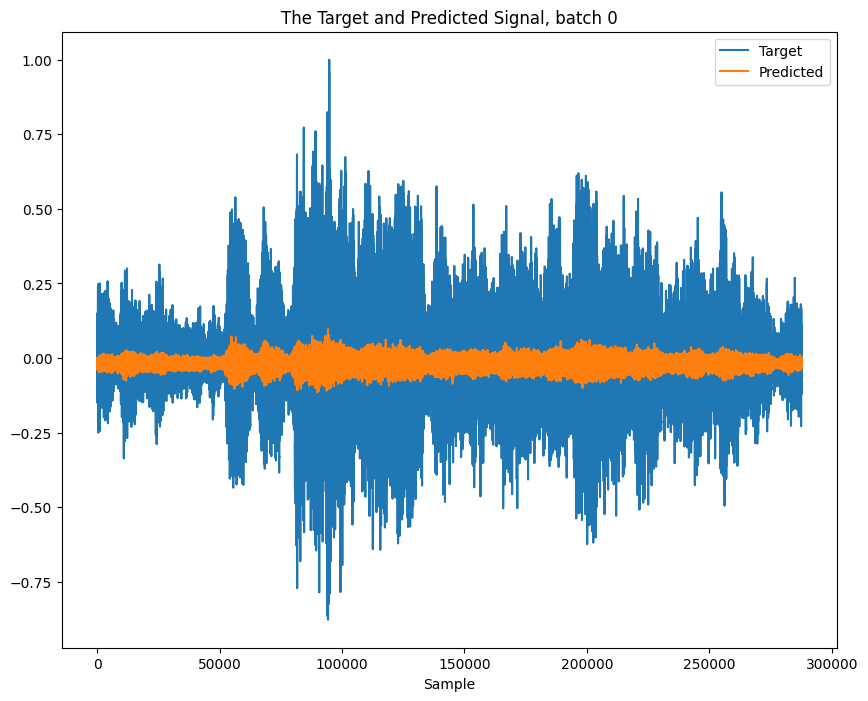

In [ ]:
plt.figure(figsize=(10,8))
for b in range(batch):
    plt.plot(np.array(Y[b,0,:]))
    plt.plot(predictions[b,0,:])
    plt.legend(('Target','Predicted'))
    plt.title('The Target and Predicted Signal, batch '+str(b))
    plt.xlabel('Sample')
    plt.show()

In [ ]:
Xnoise=Xnoise.detach()
Xnoise=np.array(Xnoise)
xnoise=Xnoise[:,0,:]

xrek=predictions[:,0,:]

In [ ]:
display(ipd.Audio(xnoise, rate=samplerate));

In [ ]:
display(ipd.Audio(xrek, rate=samplerate));

In [ ]:
X_test_shifted_100 = nn.ConstantPad1d(100, 0)(X_test)
x=X_test_shifted_100+torch.from_numpy((np.random.normal(scale=0.04, size=X_test_shifted_100.shape))).float()
predictions=model(x).cpu()
predictions=predictions.detach()
predictions=np.array(predictions)

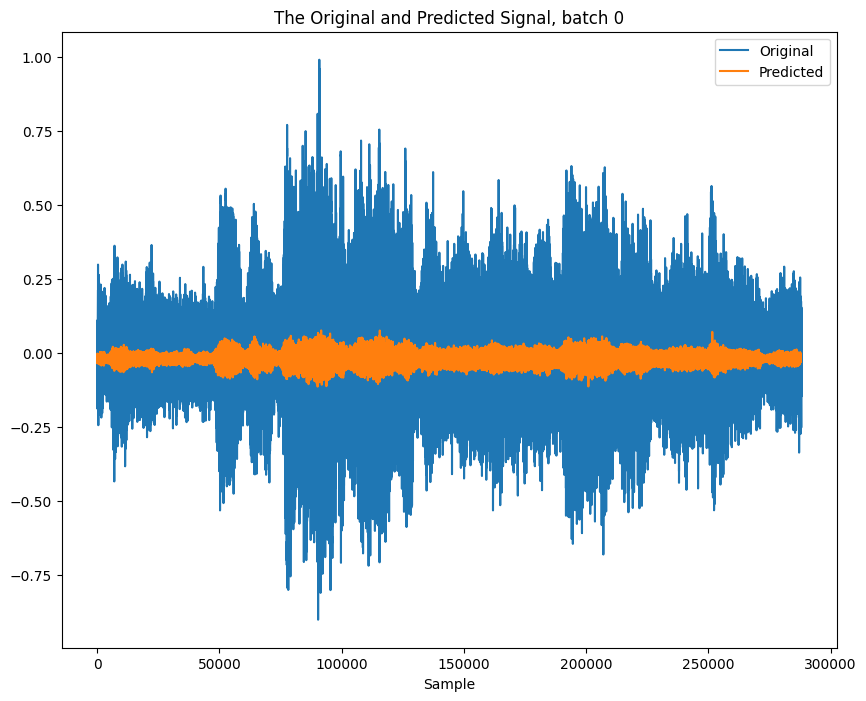

In [ ]:
plt.figure(figsize=(10,8))
for b in range(batch):
    plt.plot(np.array(x[b,0,:]))
    plt.plot(predictions[b,0,:])
    plt.legend(('Original','Predicted'))
    plt.title('The Original and Predicted Signal, batch '+str(b))
    plt.xlabel('Sample')
    plt.show()
xrek=predictions[:,0,:]

In [ ]:
display(ipd.Audio(x[:,0,:], rate=samplerate));

In [ ]:
display(ipd.Audio(xrek, rate=samplerate));